## [Neural Network 12] 자기조직화지도 SOM 실습

https://www.youtube.com/watch?v=nBhKsDbHktE&list=PLfGJDDf2OqlSAL9kE4FvT_rG4DH_8S4AQ&index=2




내용 요약

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# %matplotlib notebook


In [2]:
# SOM 클래스 정의
class SOM:
    def __init__(self, width, height, input_dim):
        # input_dim: 입력 데이터 항목 수
        self.width = width
        self.height = height
        self.input_dim = input_dim
        self.weights = np.random.rand(height, width, input_dim)
            # 가중치의 초기값은 랜덤 값
        self.learning_rate = 0.02
            # 학습률. 학습이 진행됨에 따라 점점 줄어들게 됨.
        self.radius = max(width, height)/2

    def _find_bmu(self, input_vec):
        # BMU()를 찾는 함수
        distance = np.sum((self.weights - input_vec)**2, axis=2)
            # 가중치와 입력벡터 간의 거리를 계산
            # axis=2, 세번째 축, 즉 input vector 축으로만 합산.
            # 결과는 (height, width) shape 의 matrix
        return np.unravel_index(distance.argmin(), distance.shape)
            # argmin(): distance 값들 중 최소 값의 인덱스.
            #  argmin 인자로 axis를 지정하지 않으면 평탄화 된 배열에서의 인덱스가 리턴되므로
            #  이를 다시 unravel 시켜서 다차원 인덱스로 변환하고 있음.

    def _update_weights(self, input_vec, bmu, iteration, total_iterations):
        # 가중치 업데이트 하는 함수

        # 가중치 업데이트에 필요한 "시간에 따라 변화하는 학습률"을 계산
        learning_rate = self.learning_rate * np.exp(-iteration/total_iterations)

        # 이웃의 반경 도 시간에 따라 줄어듬.
        radius_decay = self.radius * np.exp(-iteration/total_iterations)

        # 입력벡터가 들어올 경우 BMU를 찾음.
        # 각각의 뉴런들과 BMU간의 위치상의 거리를 계산.
        for x in range(self.width):
            for y in range(self.height):
                # 이웃 뉴런인지 아닌지를 결정하는 그리드 상의 거리
                dist_to_bmu = np.sqrt((x-bmu[1])**2 + (y-bmu[0])**2)

                # 격자 상의 거리로 그 뉴런이 이웃 반경안에 있는 뉴런이라면
                # 그 뉴런의 가중치를 변화시킬 influence 값을 계산
                if dist_to_bmu <= radius_decay:
                    influence = np.exp(-dist_to_bmu**2 / (2*(radius_decay**2)))

                    # 계산한 값들을 이용하여 최종적으로 가중치 업데이트
                    self.weights[y,x,:] += learning_rate * influence * \
                                        (input_vec - self.weights[y,x,:])
                    # learning_rate는 시간에 따라 줄어든 값이다.
                    # 격자 상의 거리에 따른 influence 도 곱해줌.
                    # 입력벡터와 가중치간의 차이 값도 곱해줌.
                    # 이 부분이 SOM의 가중치값을 입력값과 유사하게 바꿔주는 역할을 함.

    # 학습함수
    def train(self, data, num_iterations):
        weight_maps = []
        # 모든 iteration을 반복하는 for loop
        for i in range(num_iterations):
            # 입력벡터를 순차적으로 다 SOM에 넣음.
            for input_vec in data:
                # 각각의 입력벡터마다 BMU를 구함.
                bmu = self._find_bmu(input_vec)
                # 그 BMU 인덱스값을 사용해 이웃 뉴런들의 가중치 값을 업데이트.
                self._update_weights(input_vec, bmu, 1, num_iterations)

            # 학습 진행 상황을 애니메이션으로 보여주기 위한 준비
            # iteration 마다 하나의 weight_map을 프레임처럼 저장.
            weight_maps.append(np.copy(self.weights))
        return weight_maps

In [3]:
# SOM 객체 생성 및 학습 데이터 준비
# 좌우 20x20 정사각형 형태의 네트워크
som = SOM(20, 20, 3)
# 입력데이터는 100 개의 RGB(100x3)값 데이터
data = np.random.rand(100, 3)
num_iterations = 20

In [4]:
# 학습 실행 및 가중치 기록
weight_maps = som.train(data, num_iterations)

In [5]:
# 가중치 변화 시각화를 위한 애니메이션 함수 정의
def animate(i):
    # 각 iteration 마다 저장한 weight_maps 변수를 프레임별로 그려주기만 하면 됨.
    plt.imshow(weight_maps[i])
    plt.title(f'Iterations: {i+1}')
    plt.axis('off')

#### 애니메이션 표시 문제
- 강의에서의 코드를 그대로 사용하면 vscode 내에서 애니메이션 표시가 안됨.
- 그래서 따로 jshtml 로 변환하여 표시하는 방법을 사용.

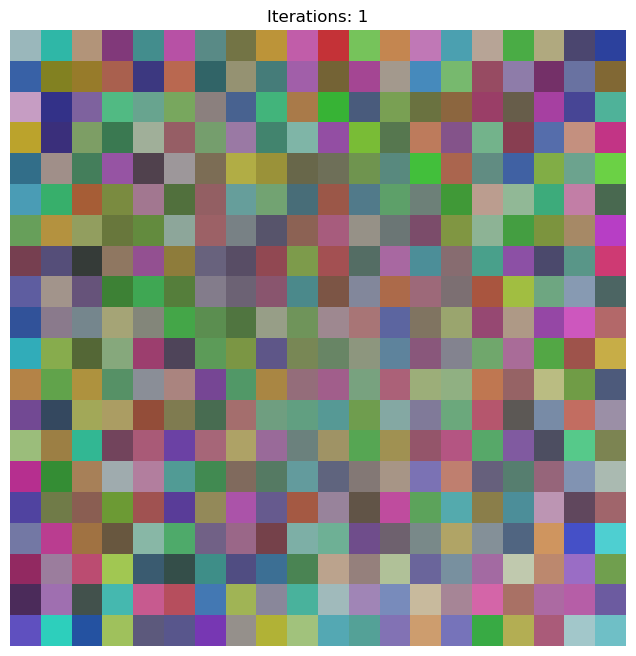

In [ ]:
# 애니메이션 생성 및 표시
from IPython.display import HTML

fig = plt.figure(figsize=(5,5))
ani = animation.FuncAnimation(fig, animate, frames=num_iterations, interval=100, repeat=False)
# plt.show()
HTML(ani.to_jshtml())

### 애니메이션에 문제가 있는 경우
- 그냥 직접 각각의 프레임을 그려주는 방법을 사용.

In [7]:
# %matplotlib inline

# 애니메이션 생성 및 표시
fig = plt.figure(figsize=(8,8))
# ani = animation.FuncAnimation(fig, animate, frames=num_iterations, interval=100, repeat=False)
plt.show()

# from time import sleep
# for k in range(num_iterations):
#     plt.imshow(weight_maps[k])
#     plt.title(f'Iterations: {k+1}')
#     plt.axis('off')
#     plt.show()
#     sleep(0.2)

<Figure size 800x800 with 0 Axes>